# Explatory Data Analysis

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import folium
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Importing Dataset

In [2]:
eda_df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [3]:
df = eda_df.copy()

In [4]:
df.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


## About Dataset

In [5]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

There are 4 null values in target column

In [6]:
df[df['Price'].isnull()]

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
73,74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


These missing values are missing at random. We can impute them with median. 

In [7]:
#For general information
df.info()

#For statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [8]:
df['Room'].value_counts()

Room
3     333
4     201
2     191
5      97
6      42
7      19
1      17
8      11
9       6
13      2
10      2
14      2
12      1
Name: count, dtype: int64

- Dataset has nearly no null values. 

- The _'Unnamed: 0'_ column is an index. We can drop this column.

- Houses are mostly about 3 rooms and on average area is 95.

- The price range is from 175k to 5.9m euros. 

## Data Cleaning and Imputation

In [9]:
#Data Cleaning part
df.drop(columns=['Unnamed: 0'], inplace = True)

In [10]:
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [11]:
# First, creating a new metric and take on average.
df['Price_per_m2'] = df['Price'] / df['Area']
median_price_per_m2 = df['Price_per_m2'].median()

# Then, locating the missing values and filling them.
missing_price = df['Price'].isnull()
df.loc[missing_price, 'Price'] = df.loc[missing_price, 'Area'] * median_price_per_m2

In [12]:
df.isnull().sum()

Address         0
Zip             0
Price           0
Area            0
Room            0
Lon             0
Lat             0
Price_per_m2    4
dtype: int64

## Univariate Analysis

### Numerical Features (Price, Area, Room)


In [13]:
df[['Price', 'Area', 'Room']].describe()

,Price,Area,Room
count,9.240000e+02,924.000000,924.000000
mean,6.243637e+05,95.952381,3.571429
std,5.411567e+05,57.447436,1.592332
min,1.750000e+05,21.000000,1.000000
25%,3.500000e+05,60.750000,3.000000
50%,4.690000e+05,83.000000,3.000000
75%,7.000000e+05,113.000000,4.000000
max,5.950000e+06,623.000000,14.000000


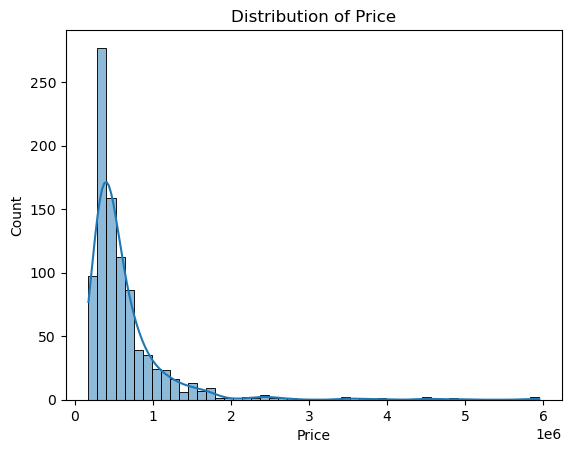

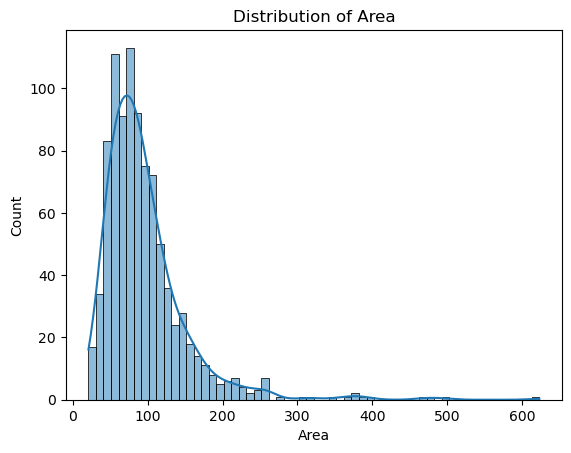

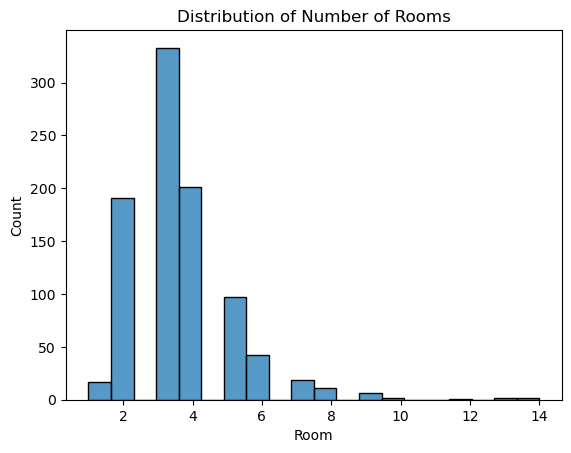

In [14]:
# Price Histogram
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

# Area Histogram
sns.histplot(df['Area'], bins=60, kde=True)
plt.title('Distribution of Area')
plt.show()

# Room Histogram
sns.histplot(df['Room'], bins=20, kde=False)
plt.title('Distribution of Number of Rooms')
plt.show()

- Most of the houses are under 1 million euros.
- The are of the houses are around 60-120 m2.
- Majority of the rooms are 3-4.

### Categorical Features (Zip Code)

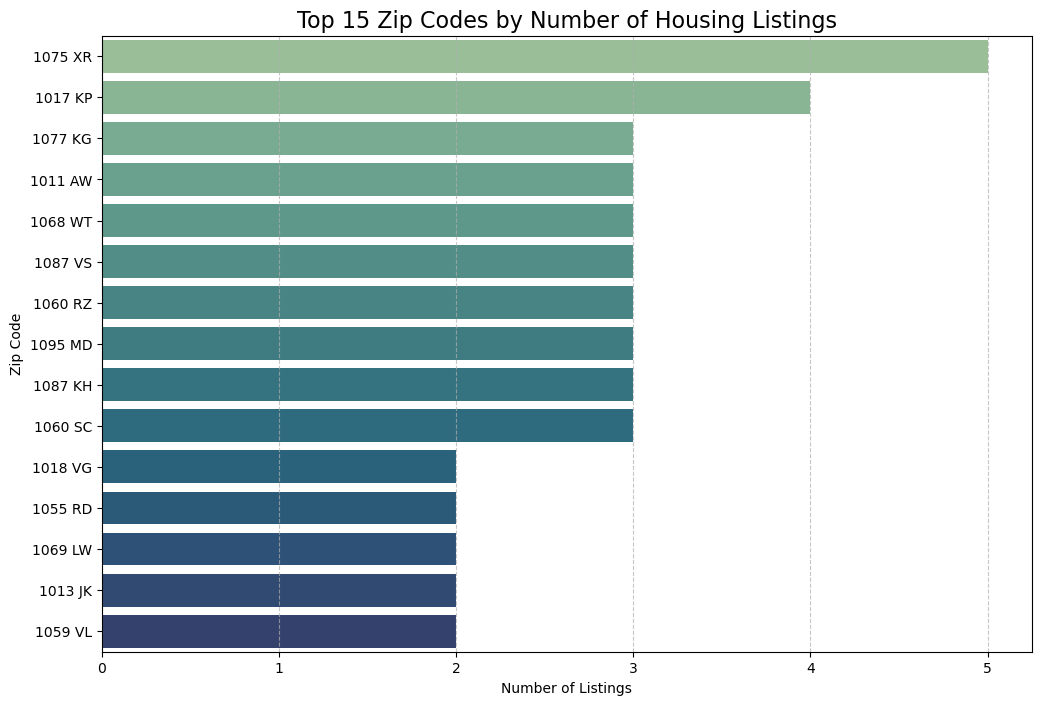

In [15]:
# Top 15 zip codes
zip_counts_15 = df['Zip'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=zip_counts_15.values,
    y=zip_counts_15.index,
    hue=zip_counts_15.index,
    palette='crest',
    legend=False)

plt.title('Top 15 Zip Codes by Number of Housing Listings', fontsize=16)
plt.xlabel('Number of Listings')
plt.ylabel('Zip Code')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Bivariate Analysis

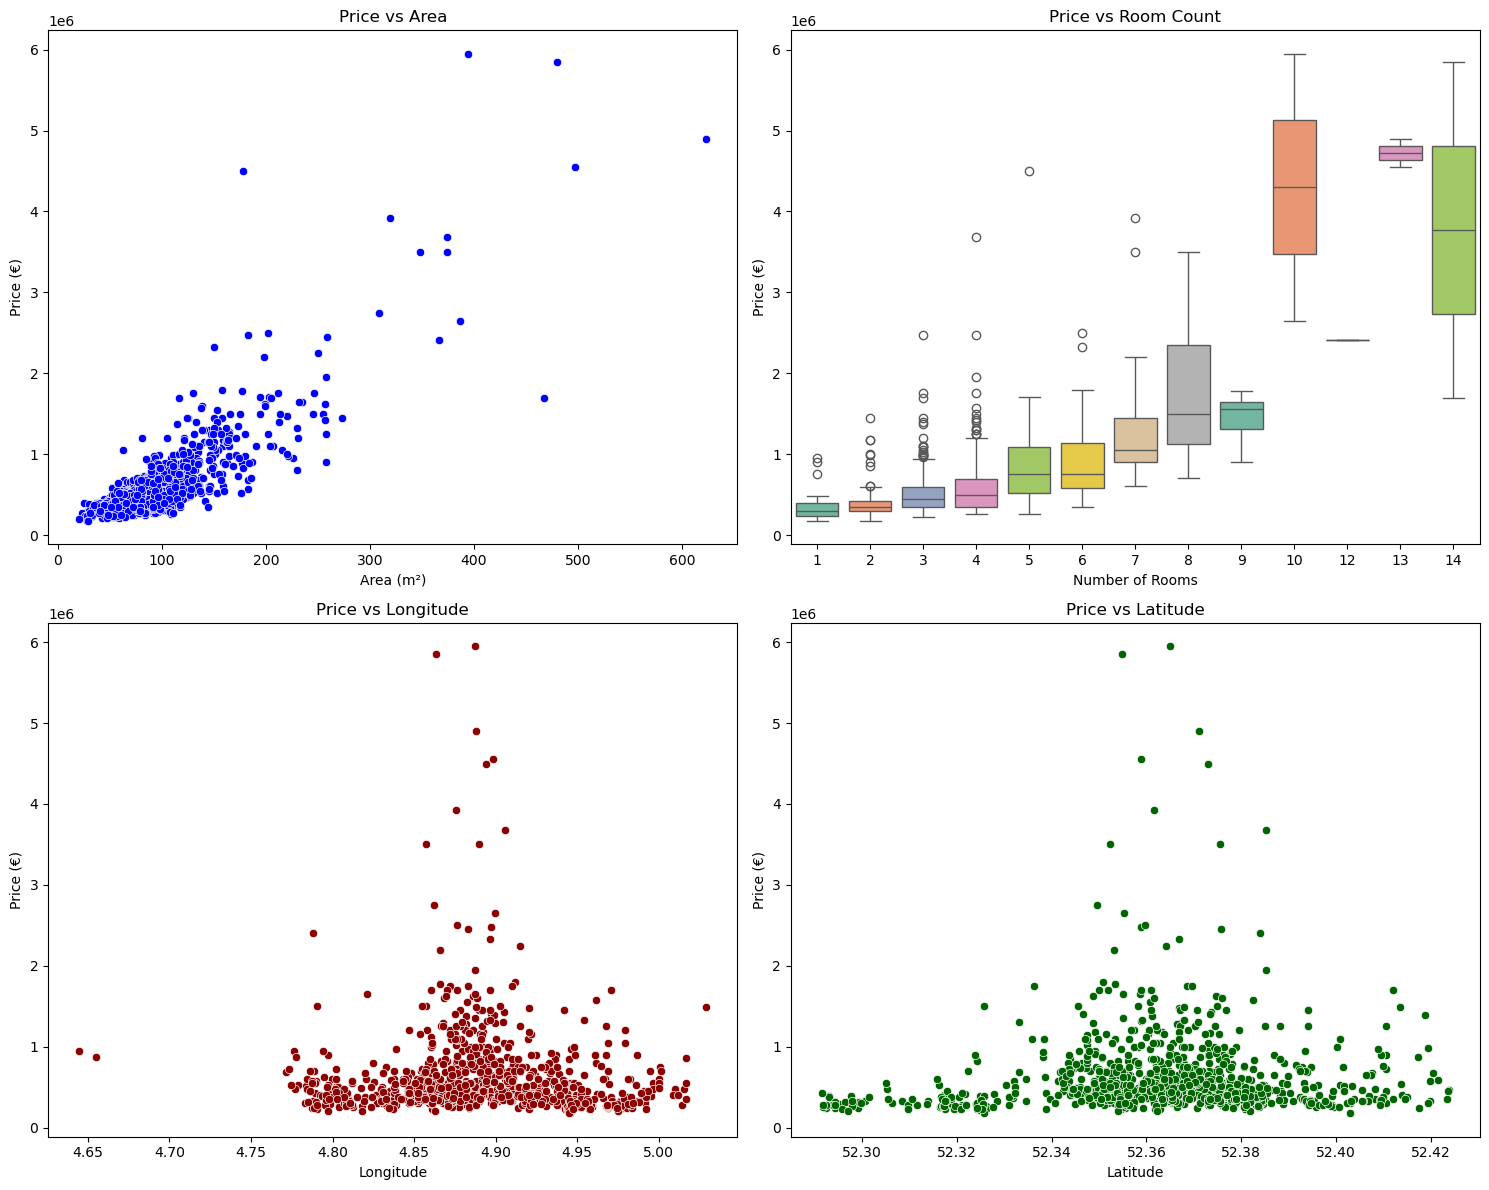

In [16]:
# Creating subplots 
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Price vs Area
sns.scatterplot(data=df, x='Area', y='Price', ax=axs[0, 0], color='blue')
axs[0, 0].set_title("Price vs Area")
axs[0, 0].set_xlabel("Area (m²)")
axs[0, 0].set_ylabel("Price (€)")

# 2. Price vs Room Count
sns.boxplot(data=df, x='Room', y='Price', hue='Room', palette='Set2', ax=axs[0, 1], legend=False)
axs[0, 1].set_title("Price vs Room Count")
axs[0, 1].set_xlabel("Number of Rooms")
axs[0, 1].set_ylabel("Price (€)")

# 3. Price vs Longitude
sns.scatterplot(data=df, x='Lon', y='Price', ax=axs[1, 0], color='darkred')
axs[1, 0].set_title("Price vs Longitude")
axs[1, 0].set_xlabel("Longitude")
axs[1, 0].set_ylabel("Price (€)")

# 4. Price vs Latitude
sns.scatterplot(data=df, x='Lat', y='Price', ax=axs[1, 1], color='darkgreen')
axs[1, 1].set_title("Price vs Latitude")
axs[1, 1].set_xlabel("Latitude")
axs[1, 1].set_ylabel("Price (€)")

plt.tight_layout()
plt.show()


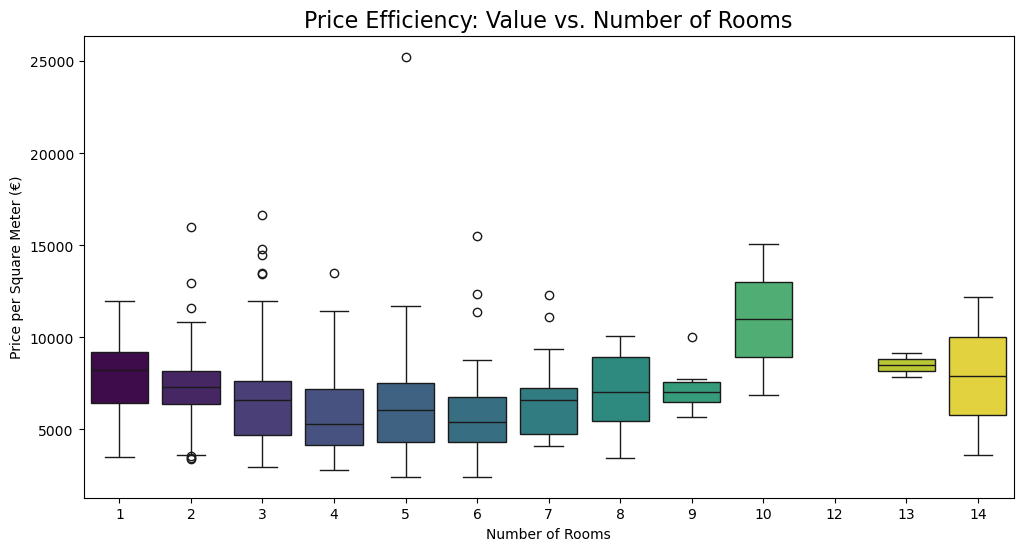

In [17]:
# Price per meter2 vs Number of Rooms
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Room', y='Price_per_m2', hue='Room', palette='viridis', legend=False)
plt.xlabel('Number of Rooms')
plt.ylabel('Price per Square Meter (€)')
plt.title('Price Efficiency: Value vs. Number of Rooms', fontsize=16)
plt.show()

- Despite the number of rooms, price efficiency doesn't change much. 

## Multivariate Analysis

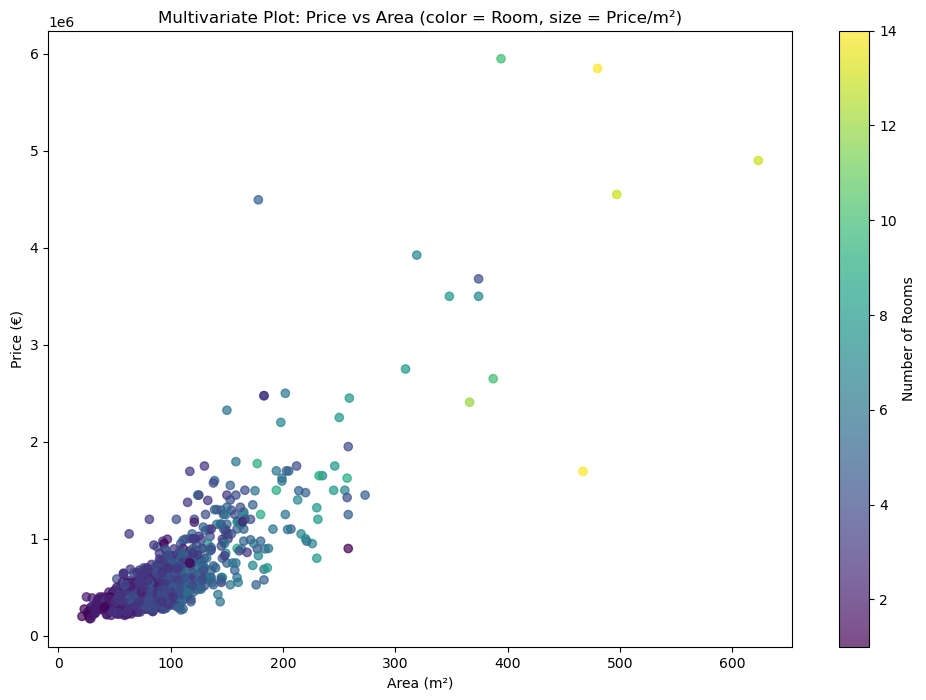

In [18]:
# Multivariate scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Area'],
    df['Price'],
    c=df['Room'],
    cmap='viridis',
    alpha=0.7
)
cbar = plt.colorbar(scatter)
cbar.set_label("Number of Rooms")
plt.xlabel("Area (m²)")
plt.ylabel("Price (€)")
plt.title("Multivariate Plot: Price vs Area (color = Room, size = Price/m²)")
plt.show()

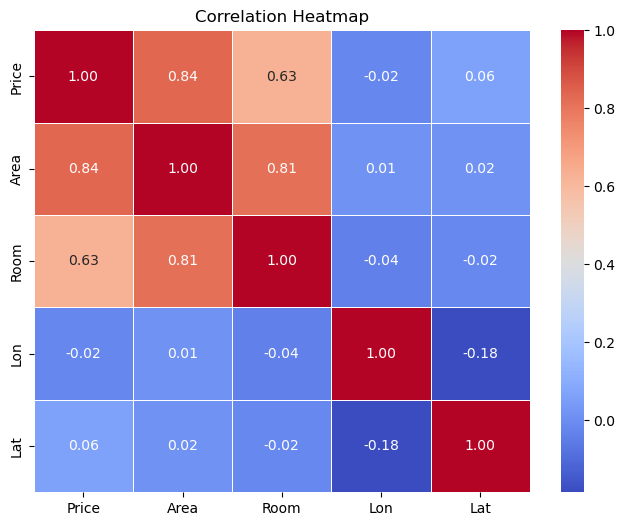

In [19]:
correlation_matrix = df[['Price', 'Area', 'Room', 'Lon', 'Lat']].corr() # for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Geospatial Location of Houses

In [20]:
# Get center of map based on mean lat/lon
center_lat = df['Lat'].mean()
center_lon = df['Lon'].mean()

# Normalize price values 
norm = mcolors.Normalize(vmin=df['Price'].min(), vmax=df['Price'].max())
cmap = plt.colormaps['RdYlGn'] 

# Creating map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='OpenStreetMap')

# Adding markers with color based on price (Red indicates cheaper houses, green indicates expensive ones).
for _, row in df.iterrows():
    price = row['Price']
    color = mcolors.to_hex(cmap(norm(price)))  
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=4,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Price: €{price:,.0f}<br>Area: {row['Area']} m²"
    ).add_to(m)

# Showing map
m
